[Kaggle Source Dataset](https://www.kaggle.com/datasets/rishabhbhartiya/unesco-world-heritage-updated-2024) / [Github Repository](https://github.com/SixMax06/progettoTPI_analisiDati_UNESCOSites)

[MathPlot Documentation](https://matplotlib.org/) / [Folium Documentation](https://python-visualization.github.io/folium/latest/)

**WARNING**

This code works only with the dataset in the repository linked above and will not work with any other dataset

Feel free to use this code as inspiration for your own work :)

---

Dataset import from Github repository

(Run this before running the other cells, otherwise they won't work)


In [ ]:
import requests

#function to download a .json dataset given a url as a parameter
def download_dataset(url):
  try:
    response = requests.get(url)
    response.raise_for_status()

  except requests.exceptions.HTTPError as err:
    print(err)
    return None

  data = response.json()
  print("Dataset imported correctly")
  return data

#dataset import inside two variables (dictionaries)
UNESCO_dataset_url = "https://raw.githubusercontent.com/SixMax06/progettoTPI_analisiDati_UNESCOSites/refs/heads/main/datasets/UNESCO_WORLD_HERITAGE.json"
data = download_dataset(UNESCO_dataset_url)

StatesLocation_dataset_url = "https://raw.githubusercontent.com/SixMax06/dataAnalysis_UNESCOSites/refs/heads/main/datasets/COUNTRIES_LATLONG.json"
StatesLocation = download_dataset(StatesLocation_dataset_url)

Dataset imported correctly
Dataset imported correctly


Data Analysis

In [ ]:
#general information about the dataset

print(f'Number of sites: {len(data)}\n')

oldest, newest, Lrank, Hrank, Lrating, Hrating = 2025, 0, 2000, 0, 5, 0   #initializing all variables needed

#search for the values
for site in data:
  if site["Nomination Year"] > newest:
    newest = site["Nomination Year"]
  if site["Nomination Year"] < oldest:
    oldest = site["Nomination Year"]

  if site["Rank"] > Hrank:
    Hrank = site["Rank"]
  if site["Rank"] < Lrank:
    Lrank = site["Rank"]

  if site["Rating"] > Hrating:
    Hrating = site["Rating"]
  if site["Rating"] < Lrating:
    Lrating = site["Rating"]


#putting the sites needed into lists
list_oldest, list_newest, list_Lrank, list_Hrank, list_Lrating, list_Hrating = [], [], [], [], [], []

for site in data:
  if site["Nomination Year"] == oldest:
    list_oldest.append(site["Site Name"])
  if site["Nomination Year"] == newest:
    list_newest.append(site["Site Name"])

  if site["Rank"] == Lrank:
    list_Lrank.append(site["Site Name"])
  if site["Rank"] == Hrank:
    list_Hrank.append(site["Site Name"])

  if site["Rating"] == Lrating:
    list_Lrating.append(site["Site Name"])
  if site["Rating"] == Hrating:
    list_Hrating.append(site["Site Name"])

#printing information on screen
print(f'Oldest site(s): {list_oldest}')
print(f'Newest site(s): {list_newest}\n')

print(f'Lowest rank: {list_Lrank}')
print(f'Highest rank: {list_Hrank}\n')

print(f'Lowest rating: {list_Lrating}')
print(f'Highest rating: {list_Hrating}\n')

Number of sites: 1223

Oldest site(s): ['Galapagos Islands', 'Quito', 'Aachen Cathedral', "L'Anse aux Meadows", 'Simien National Park', 'Lalibela', 'Nahanni National Park', 'Island of Gorée', 'Mesa Verde', 'Yellowstone', 'Kraków', 'Wieliczka and Bochnia Royal Salt Mines']
Newest site(s): ['Melka Kunture and Balchit', 'Niah Caves', 'Brâncusi Monumental Ensemble of Târgu Jiu', 'Phu Phrabat', 'Lençóis Maranhenses National Park', 'Badain Jaran Desert', 'Vjetrenica Cave', 'Nelson Mandela Legacy Sites', 'Cultural Landscape of Kenozero Lake', 'Sado Island Gold Mines', 'Schwerin Residence Ensemble', 'Marquesas Islands', 'Via Appia', 'Moidams', 'Al-Faw', 'The Royal Court of Tiébélé', 'Beijing Central Axis', 'Hegmataneh', 'Dacian Limes', 'Gedi', 'Umm Al-Jimāl', 'The Flow Country', 'The Pleistocene Occupation Sites of South Africa', 'Tell Umm Amer']

Lowest rank: ['Galapagos Islands']
Highest rank: ['Tell Umm Amer']

Lowest rating: ['Garamba National Park', 'Salonga National Park', 'Manovo-Gounda

In [ ]:
#site search with state

#user input
state = input("Insert state name: ")
found = False

#search for needed site: if found prints info, else prints an error message
for site in data:
  if site["Country"] == state:
    print(f'Site No.{site["ID"] + 1} : "{site["Site Name"]}", nominated in {site["Nomination Year"]}, ranked {site["Rank"]} in the world and rated a {site["Rating"]} out of 5')
    found = True

if not found:
  print("ERROR: Site not found")

Insert state name: China
Site No.304 : "Mount Taishan", nominated in 1987, ranked 437 in the world and rated a 3.94 out of 5
Site No.305 : "Great Wall", nominated in 1987, ranked 438 in the world and rated a 4.51 out of 5
Site No.306 : "Imperial Palace", nominated in 1987, ranked 439 in the world and rated a 4.27 out of 5
Site No.307 : "Mogao Caves", nominated in 1987, ranked 440 in the world and rated a 4.21 out of 5
Site No.308 : "Mausoleum of the First Qin Emperor", nominated in 1987, ranked 441 in the world and rated a 4.16 out of 5
Site No.314 : "Peking Man Site", nominated in 1987, ranked 449 in the world and rated a 2.29 out of 5
Site No.369 : "Huangshan", nominated in 1990, ranked 547 in the world and rated a 4.07 out of 5
Site No.437 : "Jiuzhaigou Valley", nominated in 1992, ranked 637 in the world and rated a 4.43 out of 5
Site No.438 : "Huanglong", nominated in 1992, ranked 638 in the world and rated a 4.19 out of 5
Site No.439 : "Wulingyuan", nominated in 1992, ranked 640 i

In [ ]:
#site search with nomination year

#user input
year = int(input("Insert year: "))
found = False

#search for needed site: if found prints info, else prints an error message
for site in data:
  if site["Nomination Year"] == year:
    print(f'Site No.{site["ID"] + 1} : "{site["Site Name"]}" located in {site["Country"]}, ranked {site["Rank"]}^ in the world and rated a {site["Rating"]} out of 5')
    found = True

if not found:
  print("ERROR: Site not found")

Insert year: 2002
Site No.147 : "Minaret of Jam" located in Afghanistan, ranked 211^ in the world and rated a 4.26 out of 5
Site No.672 : "Paramaribo" located in Suriname, ranked 940^ in the world and rated a 2.62 out of 5
Site No.683 : "Saint Catherine Area" located in Egypt, ranked 954^ in the world and rated a 3.65 out of 5
Site No.741 : "Val di Noto" located in Italy, ranked 1024^ in the world and rated a 3.41 out of 5
Site No.761 : "Mahabodhi Temple Complex" located in India, ranked 1056^ in the world and rated a 3.25 out of 5
Site No.764 : "Calakmul" located in Mexico, ranked 1061^ in the world and rated a 4.25 out of 5
Site No.765 : "Tokaji Wine Region" located in Hungary, ranked 1063^ in the world and rated a 2.53 out of 5
Site No.766 : "Upper Middle Rhine Valley" located in Germany, ranked 1066^ in the world and rated a 3.67 out of 5
Site No.767 : "Stralsund and Wismar" located in Germany, ranked 1067^ in the world and rated a 2.84 out of 5


In [ ]:
#site search with name

#user input
name = input("Insert site name: ")
found = False

#search for needed site: if found prints info, else prints an error message
for site in data:
  if site["Site Name"] == name:
    print(f'Site No.{site["ID"] + 1} : Located in {site["Country"]}, nominated in {site["Nomination Year"]}, ranked {site["Rank"]}^ in the world and rated a {site["Rating"]} out of 5')
    found = True

if not found:
  print("ERROR: Site not found")

Insert site name: Verona
Site No.559 : Located in Italy, nominated in 2000, ranked 797^ in the world and rated a 3.55 out of 5


In [ ]:
#site search with rank

#user input
rank = int(input("Insert rank: "))
found = False

#search for needed site: if found prints info, else prints an error message
for site in data:
  if site["Rank"] == rank:
    print(f'Site No.{site["ID"] + 1} : "{site["Site Name"]}" located in {site["Country"]}, nominated in {site["Nomination Year"]} and rated a {site["Rating"]} out of 5')
    found = True

if not found:
  print("ERROR: Site not found")

Insert rank: 100
Site No.68 : "Durmitor National Park" located in Montenegro, nominated in 1980 and rated a 3.53 out of 5


In [ ]:
#site search with rating range (from 0 to 5)

#user input
Rmin, Rmax = float(input("Insert minimun rank: ")), float(input("Insert maximun rank: "))
found = False

#search for needed site: if found prints info, else prints an error message
for site in data:
  if Rmin <= site["Rating"] <= Rmax:
    print(f'Site No.{site["ID"] + 1} : "{site["Site Name"]}" located in {site["Country"]}, nominated in {site["Nomination Year"]} and ranked {site["Rank"]}^ in the world')
    found = True

if not found:
  print("ERROR: Site not found")

Insert minimun rank: 0
Insert maximun rank: 2
Site No.9 : "Melka Kunture and Balchit" located in Ethiopia, nominated in 2024 and ranked 13^ in the world
Site No.59 : "Abu Mena" located in Egypt, nominated in 1979 and ranked 90^ in the world
Site No.86 : "Garamba National Park" located in Congo (Democratic Republic), nominated in 1980 and ranked 136^ in the world
Site No.150 : "Srebarna Nature Reserve" located in Bulgaria, nominated in 1983 and ranked 219^ in the world
Site No.194 : "Salonga National Park" located in Congo (Democratic Republic), nominated in 1984 and ranked 280^ in the world
Site No.323 : "Manovo-Gounda St. Floris" located in Central African Republic, nominated in 1988 and ranked 475^ in the world
Site No.324 : "Chongoni Rock Art" located in Malawi, nominated in 2006 and ranked 476^ in the world
Site No.404 : "Sangiran Early Man Site" located in Indonesia, nominated in 1996 and ranked 593^ in the world
Site No.470 : "Odzala-Kokoua" located in Congo (Republic), nominated

Data Analysis with Graphs and Maps

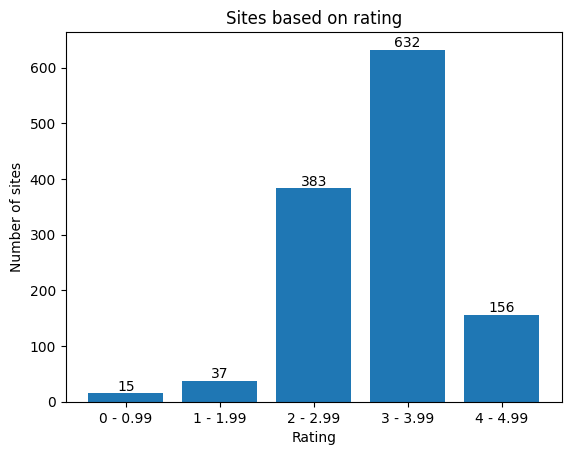

In [ ]:
#graph representing sites based on rating (range)

import matplotlib.pyplot as plt

counts = [0 for i in range(0, 5)]   #initializing counting list

#filing counting list
for site in data:
  rating = site["Rating"]
  counts[int(rating)] += 1

lables = [(str(i) + " - " + str(i + 0.99)) for i in range(0,5)]   #labels initializing

#graph initialization
fig, ax = plt.subplots()
ax.bar(lables, counts)
ax.bar_label(ax.containers[0])

plt.xlabel("Rating")
plt.ylabel("Number of sites")
plt.title("Sites based on rating")

#graph print
plt.show()

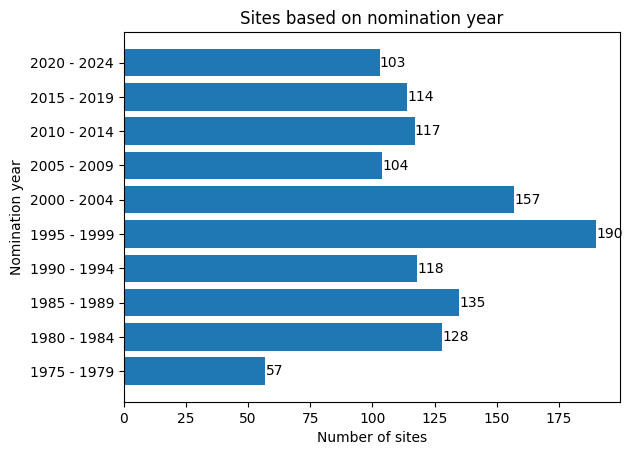

In [ ]:
#graph representing sites based on nomination year (range)

import matplotlib.pyplot as plt

#initializing counting list and lables
lables_old = [i//5 for i in range(1975, 2025, 5)]
counts = [0 for i in range(0, 10)]

#filling counting list
for site in data:
  year = site["Nomination Year"]
  i = lables_old.index(year//5)
  counts[i] += 1

lables = [(str(i) + " - " + str(i + 4)) for i in range(1975, 2025, 5)]   #labels correction

#graph initialization
fig, ax = plt.subplots()
ax.barh(lables, counts)
ax.bar_label(ax.containers[0])

plt.ylabel("Nomination year")
plt.xlabel("Number of sites")
plt.title("Sites based on nomination year")

#graph print
plt.show()

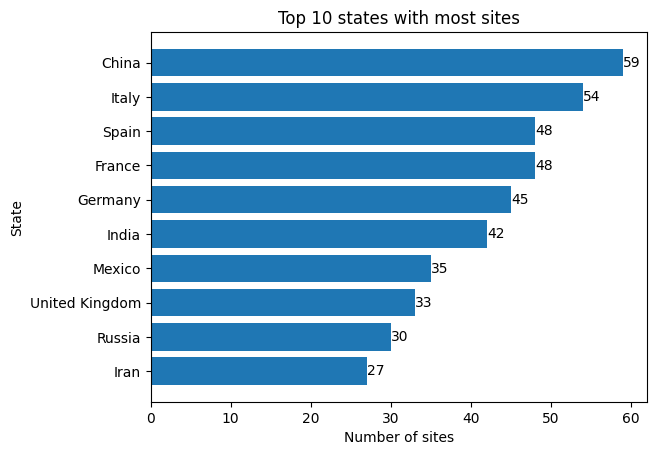

166


In [ ]:
#graph rapresenting states based on number of sites in them (top 10)

import matplotlib.pyplot as plt

top_range = 10  #change this variable to set the leaderboard range

states_list = []   #initializing list of countries

#filling countries list
for site in data:
  if site["Country"] not in states_list:
    states_list.append(site["Country"])

counts = [0 for i in range(0, len(states_list))]   #initializing counting list

#filling counting list
for site in data:
  counts[states_list.index(site["Country"])] += 1

#sorting countries by number of sites
states_counts = list(zip(counts, states_list))
states_counts.sort(reverse=True)

#picking only the "top_range" of the lists
top_states = [state[1] for state in states_counts[:top_range]]
top_counts = [state[0] for state in states_counts[:top_range]]

#graph initialization
fig, ax = plt.subplots()
ax.barh(top_states, top_counts)
ax.invert_yaxis()
ax.bar_label(ax.containers[0])

plt.ylabel("State")
plt.xlabel("Number of sites")
plt.title(f"Top {top_range} states with most sites")

#graph print
plt.show()

In [ ]:
#map that rappresents all states that have UNESCO sites (with the number of them)

import requests as rq
import folium as fl

#function to search countries names between the two datasets
def search_state_location(name):
  location = []
  for state in StatesLocation:
    if state["name"] == name:
      location = [state["latitude"], state["longitude"]]
      break
  return location

states_list = []    #countries list initialization

#filling countries list
for site in data:
  if site["Country"] not in states_list:
    states_list.append(site["Country"])

counts = [0 for i in range(0, len(states_list))]    #counting list intialization

#filling counting list
for site in data:
  counts[states_list.index(site["Country"])] += 1

states_counts = list(zip(states_list, counts))

#map and marker feature group decloaration
map = fl.Map([0.0, 0.0], zoom_start = 2)
marker_group = fl.FeatureGroup(name = "States Markers").add_to(map)

#markers declaration and adding in the map
for state in states_counts:
  location = search_state_location(state[0])
  if location != []:
    popup = fl.Popup(
        f"{state[0]} - {state[1]} site(s)",
        parse_html=True,
        max_width=200)

    fl.Marker(location = location, popup = popup).add_to(marker_group)

fl.LayerControl().add_to(map)

#map print
map